In [1]:
from biovlp.datasets.mimic_cxr_dataset import MIMICCXRDataset
from biovlp.datasets.datamodule import DataModule
from biovlp.datasets.temporal_mimic_cxr_dataset import TemporalMIMICCXRDataset, temporal_collate_fn
from transformers import GPT2TokenizerFast


In [4]:
language_model = "distilgpt2"
tokenizer = GPT2TokenizerFast.from_pretrained(language_model)
tokenizer.add_special_tokens(
    {"bos_token": "[BOS]", 'pad_token': '[PAD]'})
annotation_file = "/home/r15user2/Documents/CXR_dataset/temporal_CXR/mimic_annotation.json"
dataset_dir = "/home/r15user2/Documents/CXR_dataset/mimic_data/2.0.0/files"
dm = DataModule(TemporalMIMICCXRDataset, tokenizer, annotation_file, dataset_dir, train_data_pct=1.,
                batch_size=128, collate_fn=temporal_collate_fn)

In [6]:
from tqdm import tqdm

all_study_dates = []
for batch in tqdm(dm.train_dataloader()):
    all_study_dates.append(batch['study_date'])

Map:   0%|          | 0/145471 [00:00<?, ? examples/s]

100%|██████████| 525/525 [57:31<00:00,  6.58s/it] 


In [7]:
len(all_study_dates)

525

In [9]:
import torch

study_dates = torch.cat(all_study_dates, dim=0)

In [10]:
study_dates.shape

torch.Size([67200, 5])

/tmp/ipykernel_1970540/191590338.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(study_dates.numpy())


<Axes: ylabel='Density'>

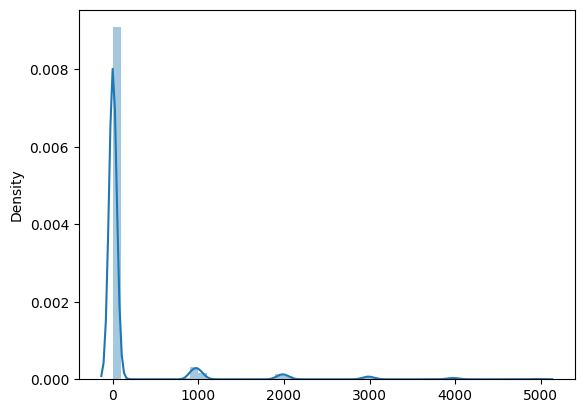

In [11]:
import seaborn as sns

sns.distplot(study_dates.numpy())

In [12]:
study_dates.max()

tensor(5000.3999)

In [1]:
from transformers import GPT2TokenizerFast
from biovlp.datasets.mimic_cxr_dataset import MIMICCXRDataset


language_model = "distilgpt2"
tokenizer = GPT2TokenizerFast.from_pretrained(language_model)
tokenizer.add_special_tokens(
    {"bos_token": "[BOS]", 'pad_token': '[PAD]'})
train_dataset = MIMICCXRDataset(
    annotation_file="/home/r15user2/Documents/CXR_dataset/temporal_CXR/mimic_annotation.json",
    dataset_dir="/home/r15user2/Documents/CXR_dataset/mimic_data/2.0.0/files",
    split="train",
    tokenizer=tokenizer
)
val_dataset = MIMICCXRDataset(
    annotation_file="/home/r15user2/Documents/CXR_dataset/temporal_CXR/mimic_annotation.json",
    dataset_dir="/home/r15user2/Documents/CXR_dataset/mimic_data/2.0.0/files",
    split="val",
    tokenizer=tokenizer
)
test_dataset = MIMICCXRDataset(
    annotation_file="/home/r15user2/Documents/CXR_dataset/temporal_CXR/mimic_annotation.json",
    dataset_dir="/home/r15user2/Documents/CXR_dataset/mimic_data/2.0.0/files",
    split="test",
    tokenizer=tokenizer
)

Map:   0%|          | 0/111750 [00:00<?, ? examples/s]

Map:   0%|          | 0/897 [00:00<?, ? examples/s]

Map:   0%|          | 0/2183 [00:00<?, ? examples/s]

In [2]:
len(train_dataset)

111750

In [13]:
import numpy as np
import pandas as pd

df = pd.DataFrame(train_dataset.tokenized_dataset["subject_id"])
print(df.value_counts())

print(df.value_counts().mean())

16454913    102
16662316     84
19133405     74
12043836     67
19509694     64
           ... 
17058141      2
17058328      2
14845506      2
11710223      2
16829157      2
Name: count, Length: 24874, dtype: int64
4.492642920318405


In [6]:
len(val_dataset)

897

In [14]:
import numpy as np
import pandas as pd

df = pd.DataFrame(val_dataset.tokenized_dataset["subject_id"])
print(df.value_counts())

print(df.value_counts().mean())

11717909    37
11888614    28
17559288    20
18057037    19
17055995    17
            ..
16615572     2
13184933     2
16145265     2
16139394     2
17387103     2
Name: count, Length: 194, dtype: int64
4.623711340206185


In [8]:
len(test_dataset)

2183

In [15]:
import numpy as np
import pandas as pd

df = pd.DataFrame(test_dataset.tokenized_dataset["subject_id"])
print(df.value_counts())

print(df.value_counts().mean())

19182863    46
13475033    46
15131736    41
14851532    36
16826047    32
            ..
15109122     2
12369221     2
14434800     2
12189285     2
13755940     2
Name: count, Length: 258, dtype: int64
8.46124031007752
